## Introduction

We can make some general observations about Easy21 using simple given policies. 

The initial state of the game is the black card held by the dealer and the black card held by the player. If the player sticks immediately then there is a chance the dealer will bust with a score lower than 1 or higher than 21 even if the initial dealer's card beats the player's initial card. The dealer's strategy is independent of the player's strategy and the cards the player holds. The player never busts if they stick after the first card.

Suppose that the player always sticks no matter what sum of cards that they hold. The conditional probability of winning the game given this policy and the initial state is shown in the diagram below.

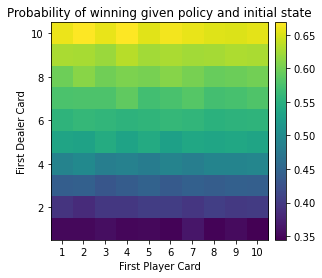

Mean number of wins given policy is 52.353%


In [1]:
import numpy as np
import environment as env
import plots as plt
e = env.Easy21Environment()
pi = np.full(e.state_size, env.Action.STICK)  # policy to always stick
ave = plt.plot_wins_dist(e, pi)
print(f'Mean number of wins given policy is {ave * 100:.3f}%')

It turns out that this is the (near) optimal policy although this is somewhat obscured in what follows by the random actions in an e-greedy strategy. The policy for when the player's sum is bigger than 10 is irrelevant because it is optimal to stick on the first card so the sum does not progress beyond 10.

Let's try the policy of sticking if the player's sum is 10 or below and hitting if above.

In [2]:
pi = np.empty(e.state_size, dtype=env.Action)
for d in range(1, e.max_initial_dealer_card+1):
    for p in range(1, e.max_player_sum+1):
        if p <= 10:
            pi[d, p] = env.Action.STICK
        else:
            pi[d, p] = env.Action.HIT

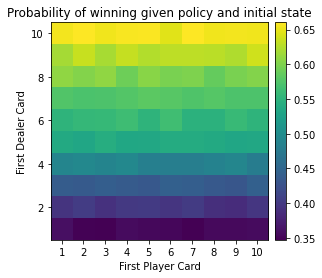

Mean number of wins given policy is 52.229%


In [3]:
ave = plt.plot_wins_dist(e, pi)
print(f'Mean number of wins given policy is {ave * 100:.3f}%')

We see there is little difference in the win rate. It is easy to show by varying the boundary between stick and hit that we cannot do better than the always stick policy.

## 1. Monte-Carlo

The model is first trained using Monte-Carlo. Output is shown in the table below including
the percentage number of wins from the policy.

In [4]:
import mc
model = mc.monte_carlo(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,9.162646,46.695330,NaN
1,20000.0,3.145440,48.582571,NaN
2,30000.0,1.721827,49.365021,NaN
3,40000.0,1.303283,49.701257,NaN
4,50000.0,0.975446,49.987000,NaN
5,60000.0,0.729227,50.207497,NaN
6,70000.0,0.640607,50.383566,NaN
7,80000.0,0.496222,50.495619,NaN
8,90000.0,0.656209,50.562772,NaN
9,100000.0,0.543653,50.693493,NaN


Notice that we have not achieved the win rate of the all stick strategy after 100,000 episodes. The final value function and the optimal policy are shown in the plots below.


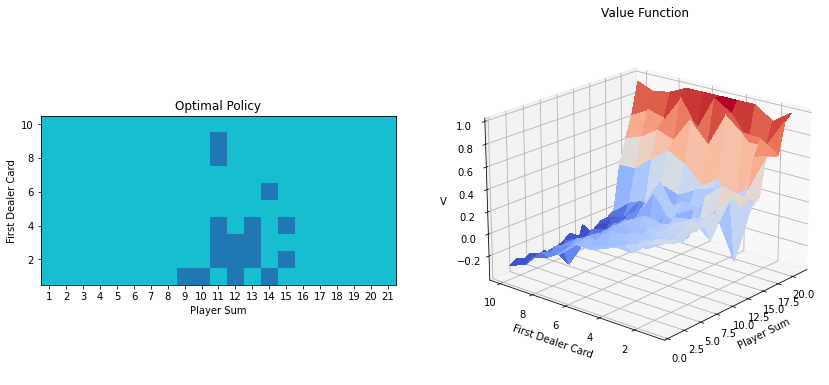

In [5]:
import plots as plt
plt.plot_value_policy(model)

We defer using more episodes to the next section because Monte-Carlo is a slow algorithm.

## 2. SARSA($\lambda$)

First we use TD(0) learning to train the model.

In [6]:
import td
model = td.sarsa0(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,7.826118,47.035296,NaN
1,20000.0,2.542337,47.867607,NaN
2,30000.0,1.259605,48.625046,NaN
3,40000.0,0.995449,49.363766,NaN
4,50000.0,0.799554,49.829003,NaN
5,60000.0,0.700144,49.984167,NaN
6,70000.0,0.542713,50.190712,NaN
7,80000.0,0.518418,50.359371,NaN
8,90000.0,0.429814,50.476106,NaN
9,100000.0,0.374267,50.555494,NaN


The plots show the final value function and policy

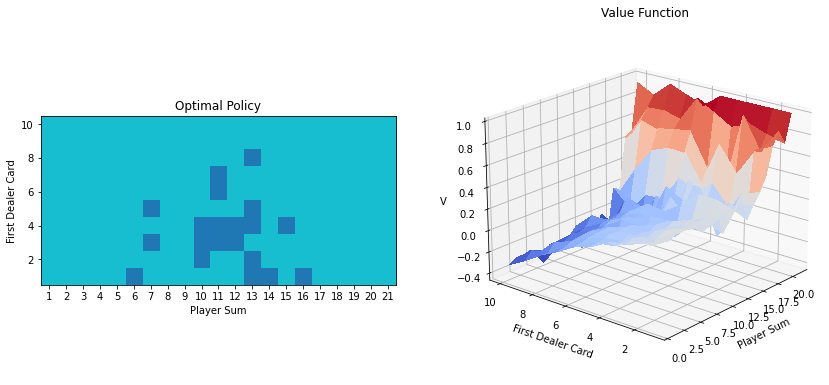

In [7]:
plt.plot_value_policy(model)

With one million episodes we obtain the results below.

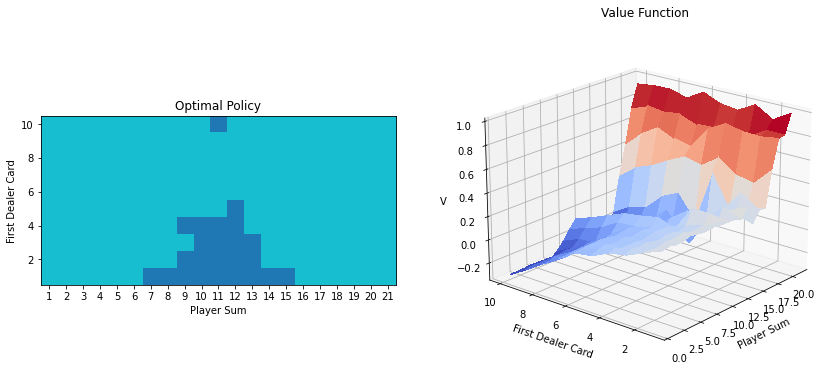

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,8.516149,46.645335,NaN
1,20000.0,2.840166,47.887606,NaN
2,30000.0,1.476022,48.901703,NaN
3,40000.0,0.955830,49.271268,NaN
4,50000.0,0.830611,49.595008,NaN
...,...,...,...,...
95,960000.0,0.041719,52.135779,NaN
96,970000.0,0.051108,52.133761,NaN
97,980000.0,0.041482,52.132804,NaN
98,990000.0,0.036644,52.124998,NaN


In [8]:
model = td.sarsa0(num_episodes=1000000)
plt.plot_value_policy(model)
model.df

This policy still has a few hits when the player's sum is 9 or 10, but we still have not achieved the win rate of the always stick strategy.

## 3. Linear value function approximation

Finally the model is trained using a linear value function approximation and TD learning.
Output from the model training is shown in the table below.

In [9]:
import fa
model = fa.lfa(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,4.873406,50.354965,NaN
1,20000.0,2.712531,50.452477,NaN
2,30000.0,2.564502,50.671644,NaN
3,40000.0,2.102142,51.143721,NaN
4,50000.0,1.852840,51.178976,NaN
5,60000.0,1.949036,51.294145,NaN
6,70000.0,2.066959,51.302124,NaN
7,80000.0,2.369678,51.350608,NaN
8,90000.0,2.106034,51.281652,NaN
9,100000.0,1.876013,51.332487,NaN


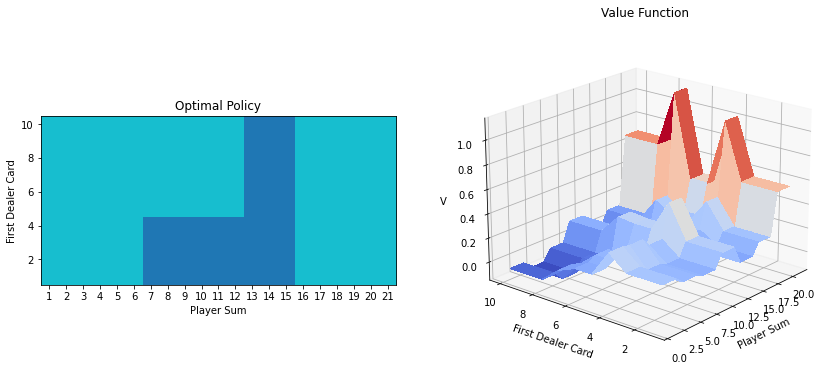

In [10]:
plt.plot_value_policy(model)

This policy is closer to the always stick strategy so the win rate is relatively high compared with previous sections for 100,000 episodes.

Even with very high numbers of episodes the linear value function approach cannot yield a higher win rate than the always stick strategy. This is because the always stick strategy cannot be accurately represented given optimal behaviour when the player sum is greater than 10.